# code for find w1 , w2 and

Weight vector: [[1. 1.]]
Bias: [-2.]


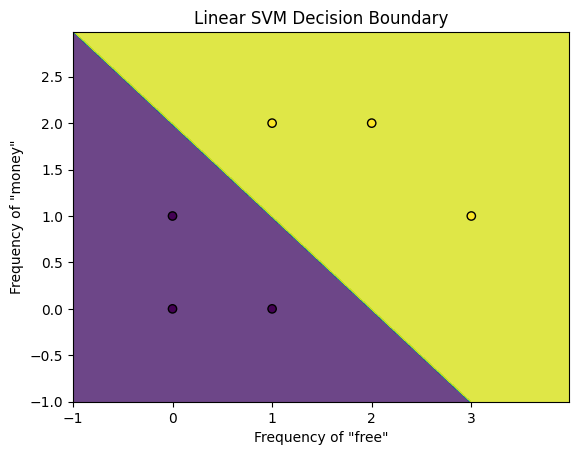

1

In [ ]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
X = np.array([[3, 1], [1, 2], [0, 1], [1, 0], [2, 2], [0, 0]])
y = np.array([1, 1, -1, -1, 1, -1])

# Create and train the Linear SVM model
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X, y)

# Display the weight vector and bias
print(f'Weight vector: {model.coef_}')
print(f'Bias: {model.intercept_}')

# Visualization function
def plot_decision_boundary(clf, X, y):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Frequency of "free"')
    plt.ylabel('Frequency of "money"')
    plt.title('Linear SVM Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(model, X, y)
1

# Kernal fucntions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

# Define a function to plot decision boundaries
def plot_decision_boundary(X, y, clf, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


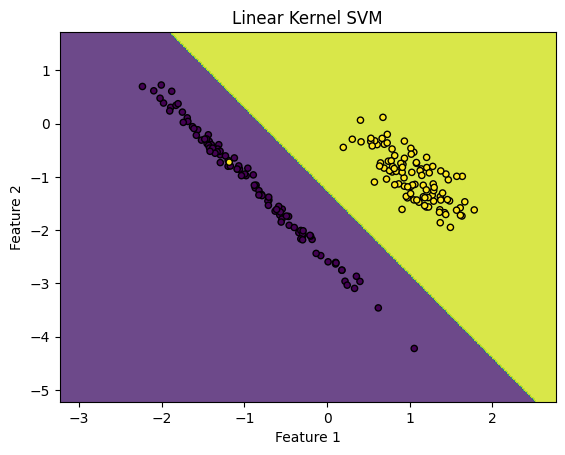

In [2]:
# Train a Linear SVM
clf_linear = SVC(kernel='linear')
clf_linear.fit(X, y)

# Plot decision boundary
plot_decision_boundary(X, y, clf_linear, 'Linear Kernel SVM')


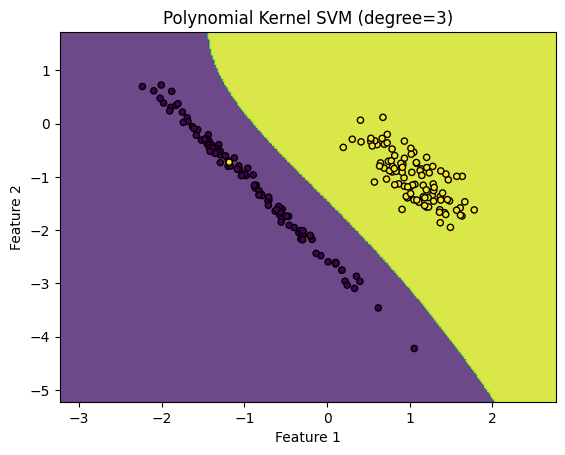

In [3]:
# Train a Polynomial SVM
clf_poly = SVC(kernel='poly', degree=3, coef0=1)
clf_poly.fit(X, y)

# Plot decision boundary
plot_decision_boundary(X, y, clf_poly, 'Polynomial Kernel SVM (degree=3)')


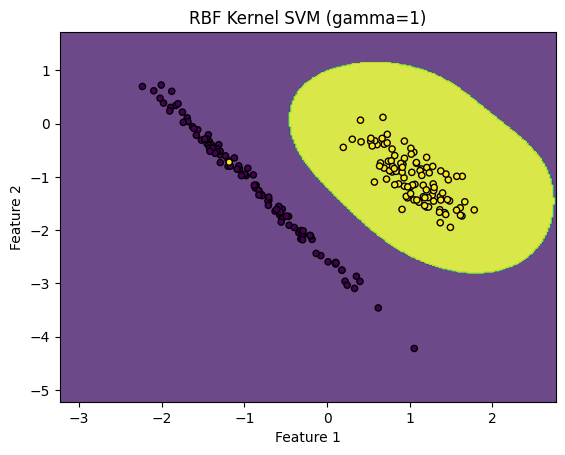

In [4]:
# Train an RBF SVM
clf_rbf = SVC(kernel='rbf', gamma=1)
clf_rbf.fit(X, y)

# Plot decision boundary
plot_decision_boundary(X, y, clf_rbf, 'RBF Kernel SVM (gamma=1)')


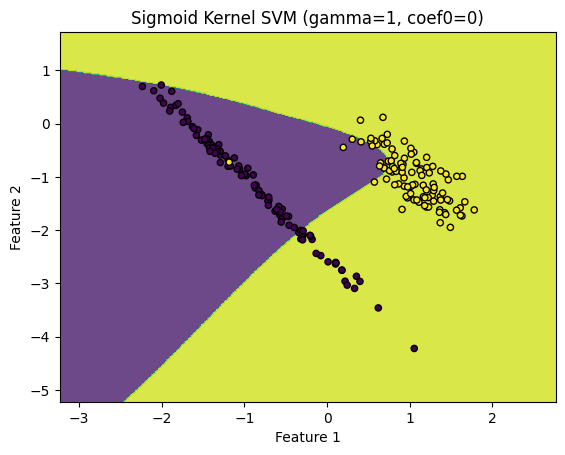

In [5]:
# Train a Sigmoid SVM
clf_sigmoid = SVC(kernel='sigmoid', gamma=1, coef0=0)
clf_sigmoid.fit(X, y)

# Plot decision boundary
plot_decision_boundary(X, y, clf_sigmoid, 'Sigmoid Kernel SVM (gamma=1, coef0=0)')


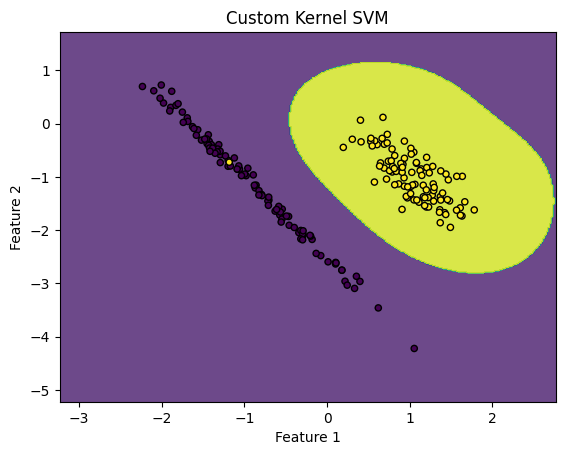

In [6]:
# Define custom kernel function
def custom_kernel(X, Y=None, gamma=1.0, mean=np.zeros(2)):
    if Y is None:
        Y = X
    X_centered = X - mean
    Y_centered = Y - mean
    sq_dists = np.sum((X_centered[:, np.newaxis] - Y_centered) ** 2, axis=2)
    return np.exp(-gamma * sq_dists)

# Train an SVM with custom kernel
clf_custom = SVC(kernel=lambda X, Y: custom_kernel(X, Y, gamma=1.0, mean=np.array([0, 0])))
clf_custom.fit(X, y)

# Plot decision boundary
plot_decision_boundary(X, y, clf_custom, 'Custom Kernel SVM')
